In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings('ignore')

In [2]:
X,Y=make_regression(n_samples=400,n_features=1,n_informative=1,noise=10,random_state=11)

In [3]:
print(X.shape)
print(Y.shape)

(400, 1)
(400,)


In [4]:
Y=Y.reshape((-1,1))

In [5]:
X=(X-X.mean())/X.std()

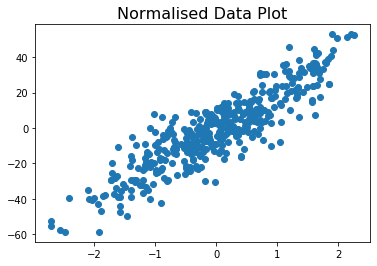

In [6]:
plt.figure()
plt.scatter(X,Y)
plt.title('Normalised Data Plot',fontsize=16)
plt.show()

In [7]:
ones=np.ones((X.shape[0],1))

In [8]:
X_=np.hstack((X,ones))
print(X_[:5,:])

[[-0.86881353  1.        ]
 [ 1.04796658  1.        ]
 [-0.2019676   1.        ]
 [-0.34017061  1.        ]
 [ 0.13317349  1.        ]]


In [9]:
def predict(X,theta):
    return np.dot(X,theta)

In [10]:
def getThetaClosedForm(X,Y):

    
    first_part=np.dot(X.T,X)
    second_part=np.dot(X.T,Y)
    
    theta=np.dot(np.linalg.pinv(first_part),second_part)
    
    return theta

In [11]:
theta=getThetaClosedForm(X_,Y)

In [12]:
print(theta)

[[19.20757336]
 [-0.9525988 ]]


In [14]:
prediction=predict(X_,theta)

In [17]:
prediction.shape

(400, 1)

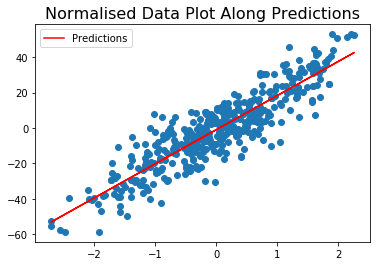

In [24]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X,prediction,color='red',label='Predictions')
plt.title('Normalised Data Plot Along Predictions',fontsize=16)
plt.legend()
plt.show()

## Taking the Same Dataset Using Sklearn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regr=LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('The Coefficient of the model is :',regr.coef_[0][0])

The Coefficient of the model is : 19.207573359296273


In [23]:
print('The Intercept of the model is :',regr.intercept_[0])

The Intercept of the model is : -0.9525988030832362


- The result of both the processes matches hence closed form regression can be used for smaller dataset to save time.